In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, Literal
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage,HumanMessage,BaseMessage
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
model_name = "gemini-2.5-flash"  # or another available model
llm=ChatGoogleGenerativeAI(model=model_name, api_key=os.getenv("GOOGLE_API_KEY"))

In [4]:
class jokestate(TypedDict):
  topic:str
  joke:str
  explaintion:str


In [6]:
def generate_joke(state:jokestate):
  propmt=f" generate a joke on the topic {state['topic']}"
  response=llm.invoke(propmt).content
  return {"joke":response}


In [7]:
def generate_explaintion(state:jokestate):
  propmt=f" write an explaination for the joke : {state['joke']}"
  response=llm.invoke(propmt).content
  return {"explaintion":response}

In [11]:
graph=StateGraph(jokestate)
graph.add_node("generate_joke",generate_joke)
graph.add_node("generate_explaintion",generate_explaintion)

graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","generate_explaintion")
graph.add_edge("generate_explaintion",END)

checkpointer=InMemorySaver()

workflow=graph.compile(checkpointer=checkpointer)

In [13]:
config1={"configurable":{"thread_id":"joke_thread_1"}}
workflow.invoke({"topic":"technology"},config=config1)

{'topic': 'technology',
 'joke': 'Why did the computer go to the doctor?\n\nBecause it had a virus, and all its files were feeling a bit *compressed*!',
 'explaintion': 'This joke works by playing on two puns and the concept of personification:\n\n1.  **The "Virus" Pun:**\n    *   In the human world, a "virus" is a germ or illness that makes people sick, requiring a doctor\'s visit.\n    *   In the computer world, a "virus" is malicious software that infects a computer system, causing it to malfunction or crash.\n    *   The humor comes from applying the human reason for going to the doctor (having a biological virus) to a computer, which would have a digital virus.\n\n2.  **The "Compressed" Pun:**\n    *   For people, feeling "compressed" can mean feeling stressed, pressured, stifled, or tightly squeezed – an emotional or physical state someone might seek help for.\n    *   For computers, "compressing" files is a technical process where the size of files is reduced (like creating a ZI

In [14]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'technology', 'joke': 'Why did the computer go to the doctor?\n\nBecause it had a virus, and all its files were feeling a bit *compressed*!', 'explaintion': 'This joke works by playing on two puns and the concept of personification:\n\n1.  **The "Virus" Pun:**\n    *   In the human world, a "virus" is a germ or illness that makes people sick, requiring a doctor\'s visit.\n    *   In the computer world, a "virus" is malicious software that infects a computer system, causing it to malfunction or crash.\n    *   The humor comes from applying the human reason for going to the doctor (having a biological virus) to a computer, which would have a digital virus.\n\n2.  **The "Compressed" Pun:**\n    *   For people, feeling "compressed" can mean feeling stressed, pressured, stifled, or tightly squeezed – an emotional or physical state someone might seek help for.\n    *   For computers, "compressing" files is a technical process where the size of files is reduced 

In [16]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'technology', 'joke': 'Why did the computer go to the doctor?\n\nBecause it had a virus, and all its files were feeling a bit *compressed*!', 'explaintion': 'This joke works by playing on two puns and the concept of personification:\n\n1.  **The "Virus" Pun:**\n    *   In the human world, a "virus" is a germ or illness that makes people sick, requiring a doctor\'s visit.\n    *   In the computer world, a "virus" is malicious software that infects a computer system, causing it to malfunction or crash.\n    *   The humor comes from applying the human reason for going to the doctor (having a biological virus) to a computer, which would have a digital virus.\n\n2.  **The "Compressed" Pun:**\n    *   For people, feeling "compressed" can mean feeling stressed, pressured, stifled, or tightly squeezed – an emotional or physical state someone might seek help for.\n    *   For computers, "compressing" files is a technical process where the size of files is reduced

In [20]:
config={"configurable":{"thread_id":"joke_thread_2"}}
workflow.invoke({"topic":"science"},config=config)


ChatGoogleGenerativeAIError: Error calling model 'gemini-2.5-flash' (RESOURCE_EXHAUSTED): 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease retry in 50.060930075s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash'}, 'quotaValue': '20'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '50s'}]}}

In [ ]:
workflow.get_state(config=config)

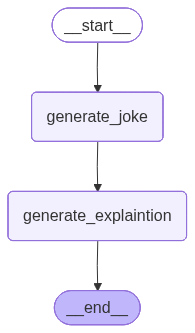

In [12]:
workflow
